# Introduction

**Unsupervised Learning**

Think about how human children learn. As a parent or teacher you don't need to show young children every breed of dog and vat there is to teach them to recognize dogs and cats. They can learn from a few examples, without a lot of explanation, and generalize and their own. 

A clustering problem is an unsupervised learning problem that asks the model to find groups of similar data points. There are a number of clustering algorithms currently in use, which tend to have slightly different characteristics.

**K-means clustering**

The k-means clustering problem attempts to divide n observations into k clusters using the Euclidean distance metric, with the objective of minimizing the variance (sum of squares) within each cluster. It is a method of vector quantization, and is useful for feature learning.

K-means assumes spherical clusters that are separable so that the mean converges towards the cluster center, and also assumes that the ordering of the data points does not matter. The clusters are expected to be of similar size, so that the assignment to the nearest cluster center is the correct assignment.

**Hierarchical Agglomerative clustering**

Hierarchical cluster analysis (HCA) can be **agglomerative** (you build the clusters bottom-up starting with individual points and ending with a single cluster) or **divisive** (you start with a single cluster and break it up until you wind up with individual points). If you're lucky you can find an intermediate stage of the clustering process that reflects a meaningful classification.

**DBSCAN clustering**

Density-based spatial clustering of application with noise (DBSCAN) is a non-parametric data-clustering algorithm that dates from 1996. It is optimized for use with databases that can accelerate geometric region queries using an R* tree or som other geometric index structure.

Essentially, DBSCAN clusters core points that have more than some minimum number of neighbors within some distance Epsilon, discards as outliers points that have no neighbors within Epsilon, and adds points that are within Epsilon of a core point to that cluster. DBSCAN is one of the most common clustering algorithms, and can find arbitrarily shaped clusters.

**Autoencoders**

**Encoder**: This part of the network compresses the input into a latent space representation. The encoder layer encodes the input image as a compressed representation in a reduced dimension. The compressed image is the disorted version of the original image.

**Code**: This part of the network represents the compressed input which is fed to the decoder.

**Decoder**: This layer decodes the encoded image back to the original dimension. The decoded image is a lossy reconstruction of the original image and it is reconstructured from the latent space representation.

# Clustering

**Preprocessing**

In [ ]:
import numpy as np

# Let's begin by allocating 3 cluster points
X = np.zeros((150, 2))

np.random.seed(seed = 42)
X[:50, 0] = np.random.normal(loc = 0.0, scale = .3, size = 50)
X[:50, 1] = np.random.normal(loc = 0.0, scale = .3, size = 50)

X[50:100, 0] = np.random.normal(loc = 2.0, scale = .5, size = 50)
X[50:100, 1] = np.random.normal(loc = -1.0, scale = .2, size = 50)

X[100:150, 0] = np.random.normal(loc = -1.0, scale = .2, size = 50)
X[100:150, 1] = np.random.normal(loc = 2.0, scale = .5, size = 50)

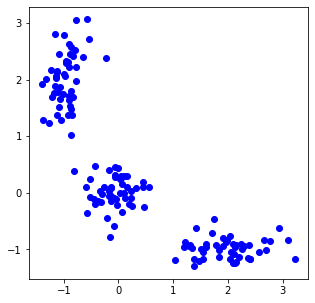

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

## K-Means Clustering

In [ ]:
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

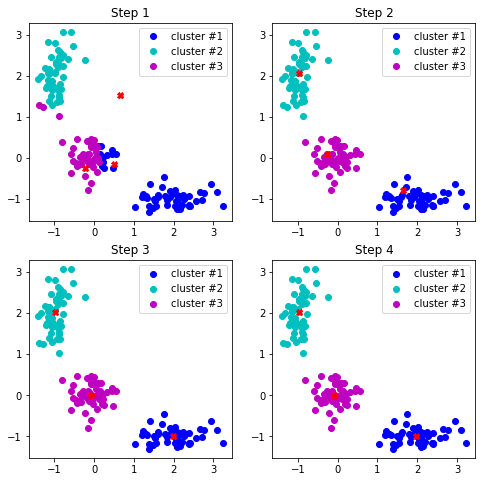

In [ ]:
# Scipy has function that takes 2 tuples and return
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)
# Let's plot K-means
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

**Choosing the number of clusters for K-means**

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(X)
  inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

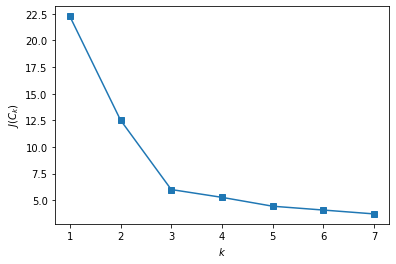

In [ ]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

## Agglomerative clustering

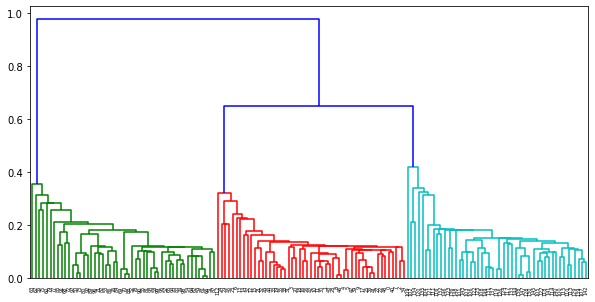

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X)

# linkage - is an implementation in agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold = 0.5)

**Comparison of clustering algorithms**

In [ ]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN

data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative','DBSCAN'])

results

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.668587,7.411565e-01,7.394638e-01,0.748061,7.437373e-01
Affinity,0.175174,6.124596e-01,9.589073e-01,0.486901,6.458574e-01
Spectral,0.756461,8.520396e-01,8.316906e-01,0.876614,8.535619e-01
Agglomerative,0.794003,8.668321e-01,8.575129e-01,0.879096,8.681701e-01
DBSCAN,0.000000,-7.965325e-17,3.616394e-17,1.000000,7.232789e-17


# Advanced Clustering: Generate clusters for sentiment analysis of the bitcoin tweets

**Preprocessing**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/bitcointweets.csv')

In [ ]:
data.columns = ['date', 'text', 'author', 'id', 'unknown', 'tags', 'url', 'sentiment']

In [ ]:
data.head()

,date,text,author,id,unknown,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['sentiment'] = encoder.fit_transform(data['sentiment'])

**Universal Sentence Encoder**

In [ ]:
pip install transformers

     |████████████████████████████████| 1.8MB 5.4MB/s 
     |████████████████████████████████| 890kB 24.9MB/s 
     |████████████████████████████████| 2.9MB 37.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=4cf30b11224f63f9315533b2897baa491c4f1f080b8345c767e7d55433c5f0d1
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from absl import logging
import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
model = hub.load(module_url)
print("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
# Reduce logging output
logging.set_verbosity(logging.ERROR)
message_embeddings = embed(data.text.values)

In [ ]:
message_embeddings

<tf.Tensor: shape=(50858, 512), dtype=float32, numpy=
array([[-0.00023593, -0.04965303, -0.0454464 , ..., -0.00699701,
        -0.0817619 , -0.0673811 ],
       [-0.00882475, -0.06427666, -0.06390415, ...,  0.05352812,
        -0.06909751, -0.0684047 ],
       [-0.0431166 , -0.07247733, -0.00263125, ..., -0.02413652,
        -0.04707826, -0.0441168 ],
       ...,
       [-0.03637784, -0.0733358 , -0.0200667 , ...,  0.00748273,
        -0.06006523, -0.06887387],
       [-0.01435385, -0.0501017 ,  0.0069228 , ..., -0.01416572,
        -0.07574022, -0.07719906],
       [-0.008284  , -0.08008462, -0.033356  , ..., -0.01549362,
        -0.03189271, -0.02582983]], dtype=float32)>

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(message_embeddings)
clusters = km.labels_.tolist()

**Visualization**

**Dimensionality reduction**

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

data = message_embeddings
pca = PCA(2)

# Transform the data
data_new = pca.fit_transform(data)

**Cluster training**

In [ ]:
# Initialize the class object
kmeans = KMeans(n_clusters=3)

# Predict the labels of clusters
label = kmeans.fit_predict(data_new)

# Getting unique labels
u_labels = np.unique(label)

labels = kmeans.labels_

**Visualization of the clusters**

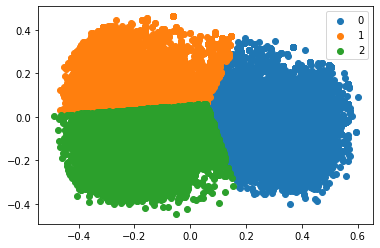

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plotting the results:
for i in u_labels:
  plt.scatter(data_new[label == i , 0] , data_new[label == i , 1] , label = i)
plt.legend()
plt.show()

## Agglomerative Clustering

**Dimensionality reduction**

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

data = message_embeddings
pca = PCA(2)

# Transform the data
data_new = pca.fit_transform(data)

**Cluster training**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Define the structure A of the data. Here are 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data_new, n_neighbors = 10, include_self = False)

In [ ]:
model = AgglomerativeClustering(n_clusters=3, connectivity=connectivity, linkage='ward').fit(data_new)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 29 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


In [ ]:
clusters = model.labels_.tolist()

In [ ]:
model.labels_

array([2, 0, 2, ..., 0, 2, 0])

**Visualization of the clusters**

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 29 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


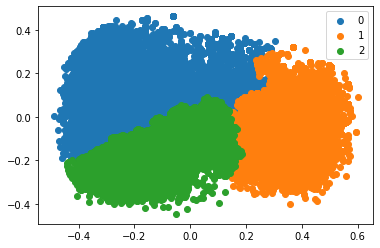

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

label = model.fit_predict(data_new)

u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(data_new[label == i , 0] , data_new[label == i , 1] , label = i)
plt.legend()
plt.show()

# Deep Encoding for Categorical Data

**Preprocessing**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Exercise_11_bike_sharing_daily.csv')

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data_small_df = data[['dteday', 'cnt', 'mnth']]

In [ ]:
data_small_df.head()

,dteday,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


In [ ]:
data_small_df = data_small_df.sort_values(by = ['mnth', 'dteday'])
data_small_df.head()

,dteday,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


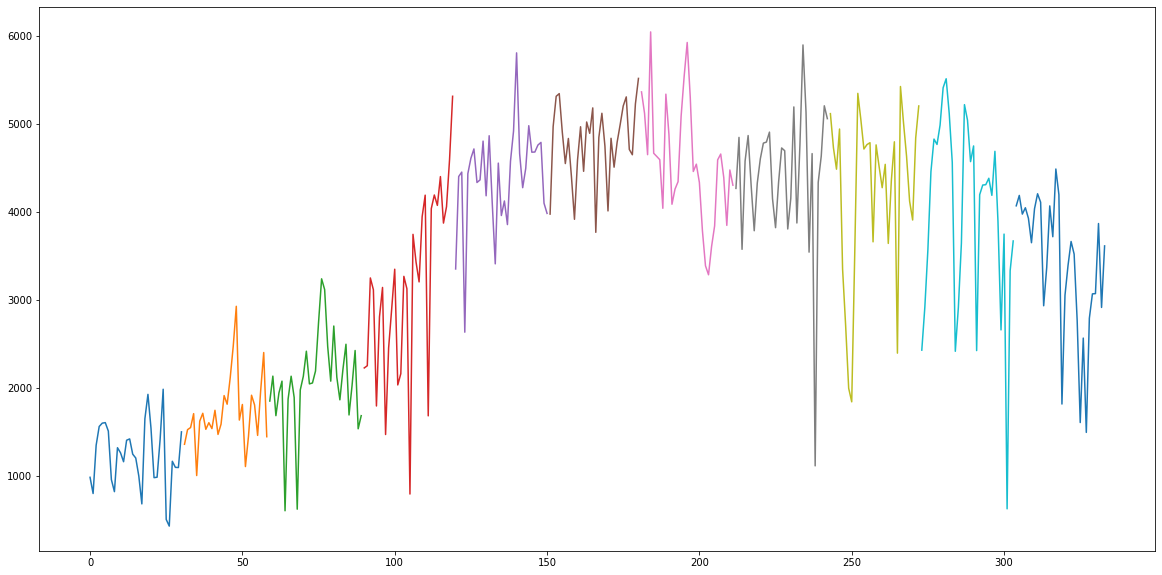

In [ ]:
data_plot_2 = data[['dteday', 'cnt', 'mnth', 'yr']]
data_plot_2 = data_plot_2[data_plot_2['yr'] == 0]

for x in range(1, 12):
  data_plot_2[data_plot_2['mnth'] == x]['cnt'].plot(figsize=(20, 10))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_small_df['cnt_Scaled'] = scaler.fit_transform(data_small_df[['cnt']])
data_small_df.head()

,dteday,cnt,mnth,cnt_Scaled
0,2011-01-01,985,1,0.110792
1,2011-01-02,801,1,0.089623
2,2011-01-03,1349,1,0.152669
3,2011-01-04,1562,1,0.177174
4,2011-01-05,1600,1,0.181546


## Traditional Embeddings

In [ ]:
pd.get_dummies(data_small_df['mnth']).head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


**Deep Encoding**

In [ ]:
data_small_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
data_small_df['mnth'] = data_small_df['mnth']-1
data_small_df['mnth'] = data_small_df['mnth'].astype(int)

**Define Keras Model**

In [ ]:
from keras.layers import Dense,Embedding, Flatten
from keras.models import Sequential
embedding_size = 3

model = Sequential()
model.add(Embedding(input_dim = 12, output_dim = 3, input_length = 1, name="embedding"))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))

**Compile Keras Model**

In [ ]:
model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])

**Fit Keras Model**

In [ ]:
model.fit(x = data_small_df['mnth'].values  , y=data_small_df['cnt_Scaled'].values   , epochs = 50, batch_size = 4)

Epoch 1/50
183/183 [==============================] - 1s 1ms/step - loss: 0.1493 - accuracy: 0.0026
Epoch 2/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.0013
Epoch 3/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 2.2335e-05
Epoch 4/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.0015
Epoch 5/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 7.9868e-04
Epoch 6/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 0.0033
Epoch 7/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 5.1284e-04
Epoch 8/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 7.5948e-04
Epoch 9/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.0018
Epoch 10/50
183/183 [==============================] - 0s 1ms/step - loss: 0.0296 - 

**Get Embeddings**

In [ ]:
layer = model.get_layer('embedding')
output_embeddings = layer.get_weights()
output_embeddings

[array([[ 0.23006487, -0.02837214, -0.04503892],
        [ 0.13856135, -0.02573039, -0.14747944],
        [ 0.04720479, -0.00619497, -0.02551225],
        [-0.03355419, -0.00727865, -0.02787451],
        [-0.11059501,  0.02378928,  0.04666044],
        [-0.1581893 , -0.00957779,  0.04791855],
        [-0.13382667, -0.00291104,  0.07492141],
        [-0.12441044, -0.02481978,  0.09994685],
        [-0.14144166, -0.012107  ,  0.11646404],
        [-0.09487198,  0.01938964,  0.03089133],
        [-0.00069843,  0.03485578,  0.00684513],
        [ 0.06940132, -0.00427531, -0.083068  ]], dtype=float32)]

In [ ]:
output_embeddings_df = pd.DataFrame(output_embeddings[0])
output_embeddings_df = output_embeddings_df.reset_index()
output_embeddings_df.columns = ['mnth', 'embedding_1', 'embedding_2', 'embedding_3']
output_embeddings_df

,mnth,embedding_1,embedding_2,embedding_3
0,0,0.230065,-0.028372,-0.045039
1,1,0.138561,-0.025730,-0.147479
2,2,0.047205,-0.006195,-0.025512
3,3,-0.033554,-0.007279,-0.027875
4,4,-0.110595,0.023789,0.046660
5,5,-0.158189,-0.009578,0.047919
6,6,-0.133827,-0.002911,0.074921
7,7,-0.124410,-0.024820,0.099947
8,8,-0.141442,-0.012107,0.116464
9,9,-0.094872,0.019390,0.030891


**Visualization**

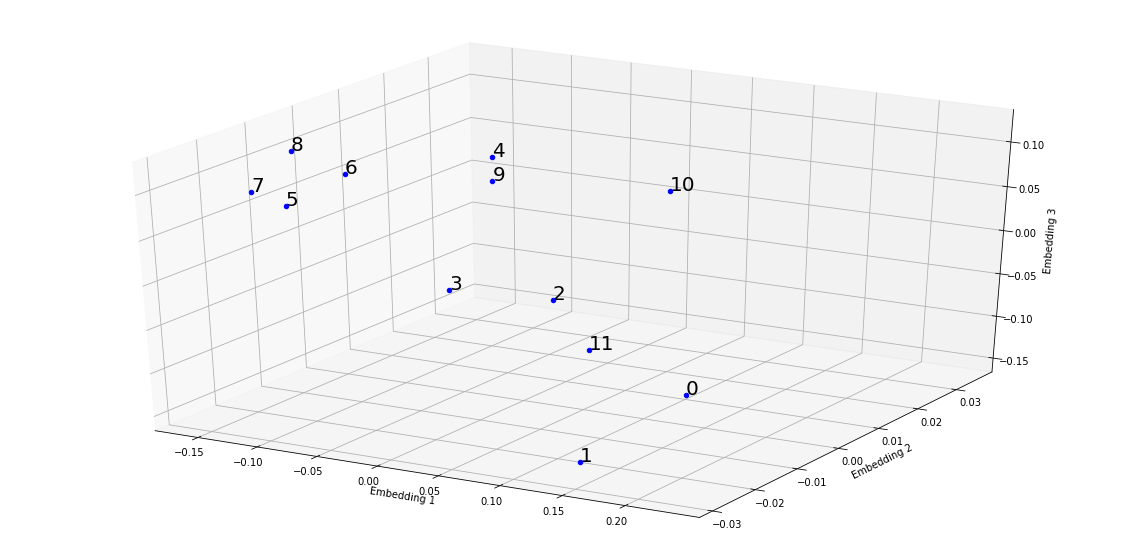

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

m = output_embeddings_df.iloc[:,1:].to_numpy()
labels = output_embeddings_df.iloc[:,0:1].to_numpy()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(m[i,0],m[i,1],m[i,2], color='b')
    ax.text(m[i,0],m[i,1],m[i,2],'%s'%(str(labels[i][0])), size=20, zorder=1, color='k')

ax.set_xlabel('Embedding 1')  
ax.set_ylabel('Embedding 2')  
ax.set_zlabel('Embedding 3')  
plt.show()